In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [ ]:
alphabet = list(string.ascii_lowercase)

In [ ]:
index = 0
labelledDfsByLabel = {}

for letter in alphabet:
  df = pd.read_csv(letter.upper() + '.csv')
  df = df.assign(label = [*map(lambda _ : index, [*range(len(df))])])
  labelledDfsByLabel[index] = df
  index += 1

In [ ]:
labelledDfsByLabel[0].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500,label
0,34,40,40,42,45,49,54,55,52,45,...,117,117,116,116,115,114,112,111,89,0
1,24,19,19,19,19,19,19,19,19,18,...,171,171,171,174,177,179,183,183,146,0
2,52,76,76,76,75,76,77,79,79,81,...,121,120,113,120,126,127,131,135,110,0
3,33,37,37,39,41,47,50,53,50,44,...,112,111,111,110,110,109,108,106,86,0
4,51,75,76,77,76,76,77,80,77,80,...,116,115,111,103,108,128,131,134,109,0


In [ ]:
trainDf = pd.DataFrame()
validDf = pd.DataFrame()

In [ ]:
splitSize = int(3000 * .80)
splitSize

2400

In [ ]:
# sums dataframes
for label in labelledDfsByLabel.keys():
  df = labelledDfsByLabel[label]
  trainDf = pd.concat([trainDf, df[:splitSize]])
  validDf = pd.concat([validDf, df[splitSize:]])

In [ ]:
# Shuffles dataFrames
trainDf = trainDf.iloc[np.random.permutation(len(trainDf))]
validDf = validDf.iloc[np.random.permutation(len(validDf))]

In [ ]:
trainDf.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500,label
147,53,75,73,72,68,65,61,58,52,51,...,28,26,27,26,25,25,22,21,23,9
1342,48,64,64,61,59,57,55,50,48,46,...,123,124,123,122,122,123,123,124,100,1
2057,41,55,57,56,59,57,58,58,60,66,...,100,99,94,93,92,92,93,94,81,19
399,52,75,72,70,67,64,60,57,54,52,...,129,130,128,127,126,127,127,127,103,15
843,52,75,75,72,76,76,78,78,81,83,...,130,128,125,123,124,124,127,128,106,11


In [ ]:
validDf.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500,label
2869,39,49,51,53,55,60,65,66,63,55,...,134,133,133,132,131,130,129,128,102,2
2880,41,53,53,53,55,56,55,58,59,58,...,30,32,34,35,38,43,42,51,63,7
2770,51,75,76,75,75,74,78,77,76,81,...,131,128,125,124,124,127,129,134,109,3
2850,49,69,68,66,69,74,80,83,85,83,...,103,103,102,102,102,101,100,100,82,14
2431,52,76,75,75,80,87,92,95,96,95,...,103,102,102,102,102,102,100,100,82,18


In [ ]:
trainDf.to_csv('als_train.csv', index = False)

In [ ]:
len(trainDf)

62400

In [ ]:
trainDf[:int(len(trainDf) / 2)].to_csv('als_train_1.csv', index = False)

In [ ]:
trainDf[int(len(trainDf) / 2):].to_csv('als_train_2.csv', index = False)

In [ ]:
trainDf.to_csv('als_train.csv', index = False)

In [ ]:
validDf.to_csv('als_valid.csv', index = False)

In [ ]:
len(validDf)

15600

In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline

In [ ]:
len(trainDf)

62400

In [ ]:
trainDf.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500,label
147,53,75,73,72,68,65,61,58,52,51,...,28,26,27,26,25,25,22,21,23,9
1342,48,64,64,61,59,57,55,50,48,46,...,123,124,123,122,122,123,123,124,100,1
2057,41,55,57,56,59,57,58,58,60,66,...,100,99,94,93,92,92,93,94,81,19
399,52,75,72,70,67,64,60,57,54,52,...,129,130,128,127,126,127,127,127,103,15
843,52,75,75,72,76,76,78,78,81,83,...,130,128,125,123,124,124,127,128,106,11


In [ ]:
len(validDf)

15600

In [ ]:
validDf.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,pixel2500,label
2869,39,49,51,53,55,60,65,66,63,55,...,134,133,133,132,131,130,129,128,102,2
2880,41,53,53,53,55,56,55,58,59,58,...,30,32,34,35,38,43,42,51,63,7
2770,51,75,76,75,75,74,78,77,76,81,...,131,128,125,124,124,127,129,134,109,3
2850,49,69,68,66,69,74,80,83,85,83,...,103,103,102,102,102,101,100,100,82,14
2431,52,76,75,75,80,87,92,95,96,95,...,103,102,102,102,102,102,100,100,82,18


In [ ]:
# copies original dataframes
train_df = trainDf.copy()
valid_df = validDf.copy()

In [ ]:
# creates Y_train and Y_val date series
Y_train = np.array(train_df['label'])
Y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']

In [ ]:
# creates X_train and X_val date series
X_train = train_df.values.astype(np.float32)
X_val = valid_df.values.astype(np.float32)

In [ ]:
def split_val_test(x: np.array, y: np.array, pct = 0.5, shuffle = True) -> (np.array, np.array, np.array, np.array):
  """
    Parameters
      x : np.array, required
        Specify the features X

      y : np.array, required
        Specify the features y

      pct : float, optional
        Specify the percentage of data that should be used for the validation dataset

      shuffle : booelan, optional
        Whether or not to shuffle the data before splitting.

    Return
      x_val, y_val, x_test, y_test
        splitted validation and test datasets
  """
  size = len(x)                                 # computes size of the given x np.array (assuming that x and y have the same save)
  valSize = int(size * pct)                     # computes the size of np.array meant for validation

  if shuffle:                                   # if shuffle equals true, then suffle all items in the given x and y
    shuffledIndexes = np.arange(size)           # creates an "size"-length array (items are 0 to size - 1)
    np.random.shuffle(shuffledIndexes)          # shuffling indexes
    x = x[shuffledIndexes]                      # shuffling x and y in union
    y = y[shuffledIndexes]

  x_val = x[:valSize]                           # partition x_val, y_val based on valSize
  y_val = y[:valSize].reshape(valSize, 1)
  x_test = x[valSize:]                          # assigning x_test, y_test to the remaining items
  y_test = y[valSize:].reshape(valSize, 1)

  return x_val, y_val, x_test, y_test

In [ ]:
# partitioning X_val and Y_val
x_val, y_val, x_test, y_test = split_val_test(X_val, Y_val)

In [ ]:
# logs partitioned dataset shapes
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(7800, 2500)
(7800, 1)
(7800, 2500)
(7800, 1)


In [ ]:
alphabet = list(string.ascii_lowercase)
#alphabet.remove('j')
#alphabet.remove('z')
print(len(alphabet))

26


### Normalise

In [ ]:
def normalise(x) -> np.array:
  """
    Parameters
      x : np.array, required
        Specify the np.array to normalize

    Return
      normalized_x
        normalized np.array
  """

  mean = x.mean()             # Compute the arithmetic mean.
  std = x.std()               # Compute the standard deviation.

  return (x - mean) / std     # normalizing the given np.array

In [ ]:
# normalizes x_train, x_val, and x_test

x_train = normalise(X_train)
x_val = normalise(x_val)
x_test = normalise(x_test)

### Draw samples

In [ ]:
def displaySamples(samplesToDisplay, size, dim):
  """
    Parameters
      samplesToDisplay : list<str>, required
        Specify the letters to display

      size : int, required
        Specify the number of samples per letter to display

      dim : (W, H), required
        Specify the image dimentions
  """

  MAX_ROWS = size                                                 # specify the number of rows in the plot grid
  MAX_COLS = len(samplesToDisplay)                                # specify the number of columns in the plot grid
  sampleImgIndexesByLetterIndex = {}                              # holds the image sample indexes based on the letter index

  for i in range(0, MAX_COLS):
    res = np.where(Y_train == i)                                  # queries for an specify value (letter index) in the Y_train np_array
    sampleImgIndexesByLetterIndex[i] = res[0][:MAX_ROWS]          # stores the indexes that matched the query

  _, axes = plt.subplots(                                         # init fig image grid
      ncols = MAX_COLS,
      nrows = MAX_ROWS,
      figsize = (10, 2)
  )

  col = 0
  for key in sampleImgIndexesByLetterIndex:                       # iterate for each letter in order to display its samples
    sampleImgIndexes = sampleImgIndexesByLetterIndex[key]
    for row in range(0, MAX_ROWS):
        axes[row][col].imshow(X_train[sampleImgIndexes[row]].reshape(dim[0], dim[1]), cmap='gray', aspect="auto")   # display image
        axes[row][col].axis("off")
    col += 1
  plt.subplots_adjust(wspace=.05, hspace=.05)
  plt.show()

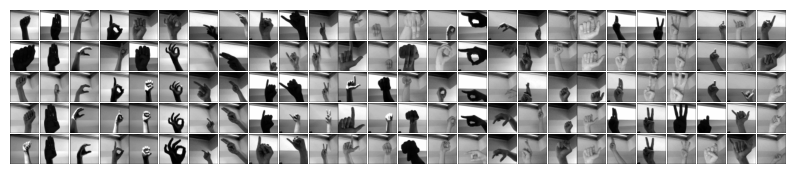

In [ ]:
displaySamples(alphabet, 5, (50, 50))

### Model

$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Utilitary functions

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True) -> (np.array, np.array):
  """
    Parameters
      mb_size : int, required
        Specify mini batch size to process

      x : np.array, required
        Specify the features X

      y : np.array, required
        Specify the features y

      shuffle : booelan, optional
        Whether or not to shuffle the data before splitting.

    Return
      normalized_x
        normalized np.array
  """


  assert x.shape[0] == y.shape[0], 'X and y must be the same size'
  total_data = x.shape[0]                                                           # compute size of dataset
  if shuffle:                                                                       # if shuffle is true, then shuffle x and y in union
      idxs = np.arange(total_data)
      np.random.shuffle(idxs)
      x = x[idxs]
      y = y[idxs]
  return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))  # compute mini batch

### Custom Linear, ReLU, and Sequential classes

In [ ]:
# np_tensor no operation
class np_tensor(np.ndarray): pass

#### Linear Class

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X):
        Z = self.W @ X + self.b
        return Z

    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

#### ReLU Class

In [ ]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)

    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

#### Sequential Class

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        self.layers = layers
        self.x = None
        self.outputs = {}

    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x

    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])

    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        return np.argmax(self.__call__(X))

#### Cost function

In [ ]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # computing cost
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # computing gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

#### Training loop

In [ ]:
def accuracy(x, y, mb_size, model):
  correct = 0
  total = 0
  for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
      pred = model(x.T.view(np_tensor))
      correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
      total += pred.shape[1]
  return correct/total

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
  for epoch in range(epochs):
    for i, (x, y) in enumerate(create_minibatches(mb_size, X_train, Y_train)):
        scores = model(x.T.view(np_tensor))
        _, cost = softmaxXEntropy(scores, y)
        model.backward()
        model.update(learning_rate)
        print(f'cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size, model)}')

### Create your model and train it

In [ ]:
# number of pixels
PIXELS = X_train.shape[1]
PIXELS

2500

In [ ]:
# number of outputs
OUTPUT = len(alphabet)
OUTPUT

26

In [ ]:
# define hyper parameters
mb_size = 100               # specify the mini batch size to be process
learning_rate = 1e-4        # specify the learning rate
epochs = 1                 # defines the number of times that the learning algorithm will work

In [ ]:
# creates an instance of Sequential_layers
model = Sequential_layers([Linear(PIXELS, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, OUTPUT)])

In [ ]:
# train model
train(model, epochs, mb_size, learning_rate)